# Bank Marketing Project

## Team :
Makrand Chaudhari 

Ranjan Das

Himadri Sharma

Shehzaan Sheikh

Hemant Hingorani

Nalin Shah

## Project Description:
The project (Code) analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.


In [1]:
#Packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import preprocessing
from pylab import plot, show
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.  Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In [2]:
#Reading the csv files
bank_additional_full_df=pd.read_csv('D:/Hackathon 1/Problem_2_Bank_Marketing/bank-additional-full.csv',sep=';')
bank_additional_df=pd.read_csv('D:/Hackathon 1/Problem_2_Bank_Marketing/bank-additional.csv',sep=';')
bank_full_df=pd.read_csv('D:/Hackathon 1/Problem_2_Bank_Marketing/bank-full.csv',sep=';')
bank_df=pd.read_csv('D:/Hackathon 1/Problem_2_Bank_Marketing/bank.csv',sep=';')
bank_additional_full_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Input variables:**

1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#### Analysing Bank Additional Full file

In [3]:
#Columns information
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#size
bank_additional_full_df.shape

(41188, 21)

In [5]:
#Info
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
#Describe
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Feature Engineering

In [7]:
#Getting First 5 rows
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#Checking for null value
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Imputation

In [9]:
bank_additional_full_df["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [10]:
bank_additional_full_df.loc[(bank_additional_full_df['marital']  == 'unknown') & (bank_additional_full_df['age']  >= 40), 'marital'] = 'married'
bank_additional_full_df.loc[(bank_additional_full_df['marital']  == 'unknown') & (bank_additional_full_df['age']  < 40), 'marital'] = 'single'
bank_additional_full_df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
bank_additional_full_df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [12]:
bank_additional_full_df["job"].replace(['blue-collar','housemaid'], 'unskilled', inplace=True)
bank_additional_full_df["job"].replace(['admin','services','technician'], 'service', inplace=True)
bank_additional_full_df["job"].replace(['entrepreneur','management','self-employed'], 'professional', inplace=True)
bank_additional_full_df["job"].unique()

array(['unskilled', 'service', 'admin.', 'retired', 'professional',
       'unemployed', 'unknown', 'student'], dtype=object)

In [13]:
bank_additional_full_df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
bank_additional_full_df["education"].replace(['basic.4y','basic.6y','illiterate'], 'basic', inplace=True)
bank_additional_full_df["education"].replace(['basic.9y','high.school'], 'mid', inplace=True)
bank_additional_full_df["education"].replace(['professional.course','university.degree'], 'degree', inplace=True)
bank_additional_full_df["education"].unique()

array(['basic', 'mid', 'degree', 'unknown'], dtype=object)

In [15]:
pd.crosstab(index=bank_additional_full_df.job,columns=bank_additional_full_df.education)

education,basic,degree,mid,unknown
job,,,,
admin.,229,6116,3828,249
professional,516,3830,1246,209
retired,675,526,421,98
service,503,5520,4327,362
student,39,213,456,167
unemployed,146,404,445,19
unknown,74,57,68,131
unskilled,4304,745,4769,496


In [16]:
drop_index = bank_additional_full_df[(bank_additional_full_df.job == 'unknown') & (bank_additional_full_df.education == 'unknown')].index
print(len(drop_index))

131


In [17]:
bank_additional_full_df= bank_additional_full_df.drop(drop_index,axis=0)

In [18]:
bank_additional_full_df1 = bank_additional_full_df.copy()


### Visualizing the Data

In [19]:
import seaborn as sns

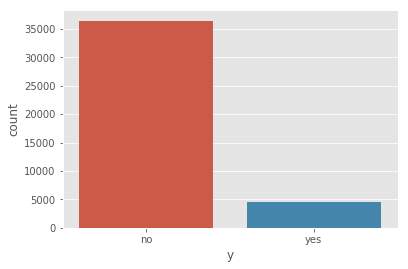

In [20]:
sns.countplot(x='y', data=bank_additional_full_df)

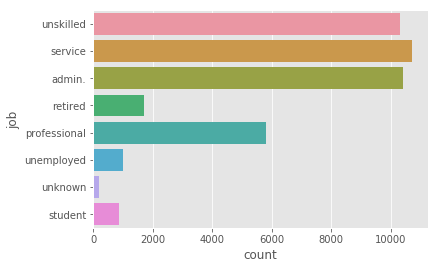

In [21]:
sns.countplot(y='job', data=bank_additional_full_df)

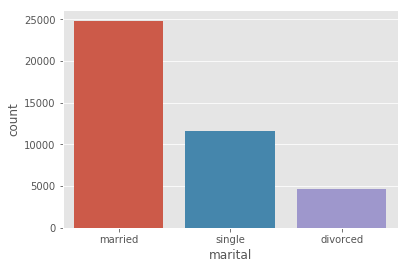

In [22]:
sns.countplot(x='marital', data=bank_additional_full_df)

In [23]:
bank_additional_full_df.education.value_counts()

degree     17411
mid        15560
basic       6486
unknown     1600
Name: education, dtype: int64

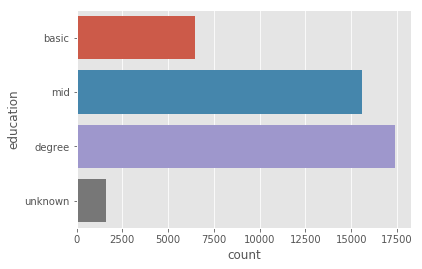

In [24]:
sns.countplot(y='education', data=bank_additional_full_df)

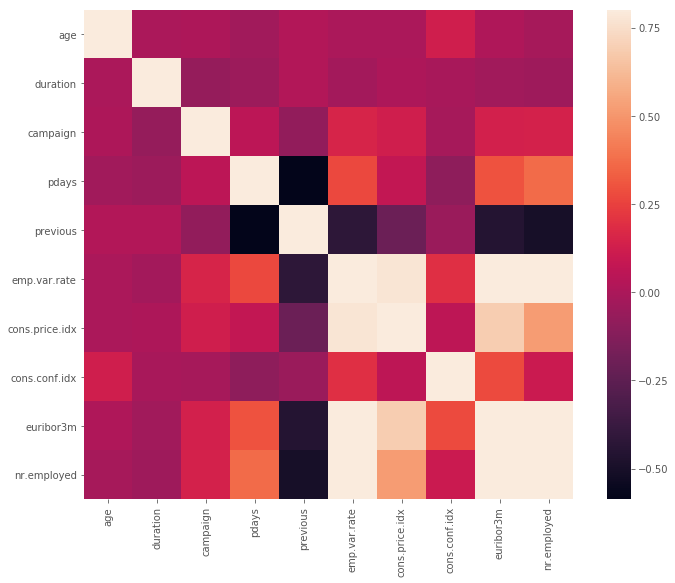

In [25]:
corrmat = bank_additional_full_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [26]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,unskilled,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,service,married,mid,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,service,married,mid,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,service,married,mid,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
#Add new categorical variables to our dataframe.
bank_additional_full_df['pdays_missing'] = 0
bank_additional_full_df['pdays_less_5'] = 0
bank_additional_full_df['pdays_greater_15'] = 0
bank_additional_full_df['pdays_bet_5_15'] = 0
bank_additional_full_df['pdays_missing'][bank_additional_full_df['pdays']==999] = 1
bank_additional_full_df['pdays_less_5'][bank_additional_full_df['pdays']<5] = 1
bank_additional_full_df['pdays_greater_15'][(bank_additional_full_df['pdays']>15) & (bank_additional_full_df['pdays']<999)] = 1
bank_additional_full_df['pdays_bet_5_15'][(bank_additional_full_df['pdays']>=5)&(bank_additional_full_df['pdays']<=15)]= 1

In [28]:
bank_additional_full_df.drop(['duration','pdays','y'],axis=1,inplace=True)

In [29]:
bank_additional_full_df = pd.get_dummies(bank_additional_full_df)
bank_additional_full_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
bank_additional_full_df.drop(['default_no','housing_no','loan_no','marital_single','contact_cellular','education_unknown','job_unknown','housing_unknown','loan_unknown', 'pdays_less_5'],axis=1,inplace=True)

In [31]:
le = preprocessing.LabelEncoder()
bank_additional_full_df["y"] = bank_additional_full_df1["y"]
bank_additional_full_df.y = le.fit_transform(bank_additional_full_df.y)
bank_additional_full_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_greater_15,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
bank_additional_full_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_greater_15,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,0


### Train and Test split
A general practice is to split your data into a training and test set. You train/tune your model with your training set and test how well it generalizes to data it has never seen before with your test set. 
We will make use of scikit learn’s `train_test_split` method to achieve this

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bank_additional_full_df, train_size=0.8, random_state=5)
print('Original:', (bank_additional_full_df.y).mean(), 'Train:', (train.y).mean(), 'Test:', (test.y).mean())

train, test = train_test_split(bank_additional_full_df, train_size=0.8, stratify=bank_additional_full_df.y.values, random_state=5)
print('Original:', (bank_additional_full_df.y).mean(), 'Train:', (train.y).mean(), 'Test:', (test.y).mean())

Original: 0.11259955671383685 Train: 0.11243720505404171 Test: 0.1132489040428641
Original: 0.11259955671383685 Train: 0.11258943522606181 Test: 0.11264003896736483


### Training the model
We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

In [34]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X=list(train.columns) #Create list of column labels from training data
Y='y'
X.remove('y')
scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
validate_std = scaler.transform(test[X])
xtrain = train_std
ytrain = train[Y]
xval = validate_std
yval = test[Y]

### Model Building

In [35]:
def run_model(xtrain, xval, ytrain, yval, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    model.fit(xtrain, ytrain)
    y_scores = model.predict_proba(xval)
    auc = roc_auc_score(yval, y_scores[:,1])
    return auc


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

models = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]

for model in models:
    # run model
    model = model()
    auc = run_model(xtrain, xval, ytrain, yval, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(model))

AUC Score = 78.77 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC Score = 63.02 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
AUC Score = 74.49 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fra

### Neural Network

In [37]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [38]:
model = Sequential()
model.add(Dense(10, input_dim=46, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
x_train_keras = np.array(xtrain)
y_train_keras = np.array(ytrain)
print(x_train_keras.shape)

y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)
print(y_train_keras.shape)

(32845, 46)
(32845, 1)


In [41]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
32845/32845 [==============================] - 0s 14us/step - loss: 0.5240 - acc: 0.7679
Epoch 2/10
32845/32845 [==============================] - 0s 7us/step - loss: 0.3232 - acc: 0.8846
Epoch 3/10
32845/32845 [==============================] - 0s 7us/step - loss: 0.2876 - acc: 0.8946
Epoch 4/10
32845/32845 [==============================] - 0s 6us/step - loss: 0.2799 - acc: 0.8981
Epoch 5/10
32845/32845 [==============================] - 0s 7us/step - loss: 0.2776 - acc: 0.8989
Epoch 6/10
32845/32845 [==============================] - 0s 7us/step - loss: 0.2765 - acc: 0.8991
Epoch 7/10
32845/32845 [==============================] - 0s 6us/step - loss: 0.2755 - acc: 0.9001
Epoch 8/10
32845/32845 [==============================] - 0s 6us/step - loss: 0.2748 - acc: 0.8999
Epoch 9/10
32845/32845 [==============================] - 0s 6us/step - loss: 0.2741 - acc: 0.9003
Epoch 10/10
32845/32845 [==============================] - 0s 6us/step - loss: 0.2736 - acc: 0.8996


In [42]:
scores = model.evaluate(np.array(xval), np.array(yval))

8212/8212 [==============================] - 0s 16us/step


In [43]:
scores

[0.2777671374405992, 0.9000243546610859]

In [44]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 90.00%


In [50]:
y_scores = model.predict_proba(xval)
auc = roc_auc_score(yval, y_scores)
auc

0.7883798248639747

### Feature Importance

In [53]:
from xgboost import plot_importance
model = XGBClassifier()
model.fit(xtrain, ytrain)
y_scores = model.predict_proba(xval)
auc = roc_auc_score(yval, y_scores[:,1])
auc

0.7956985227302231

Text(0,0.5,'Feature Importance Score')

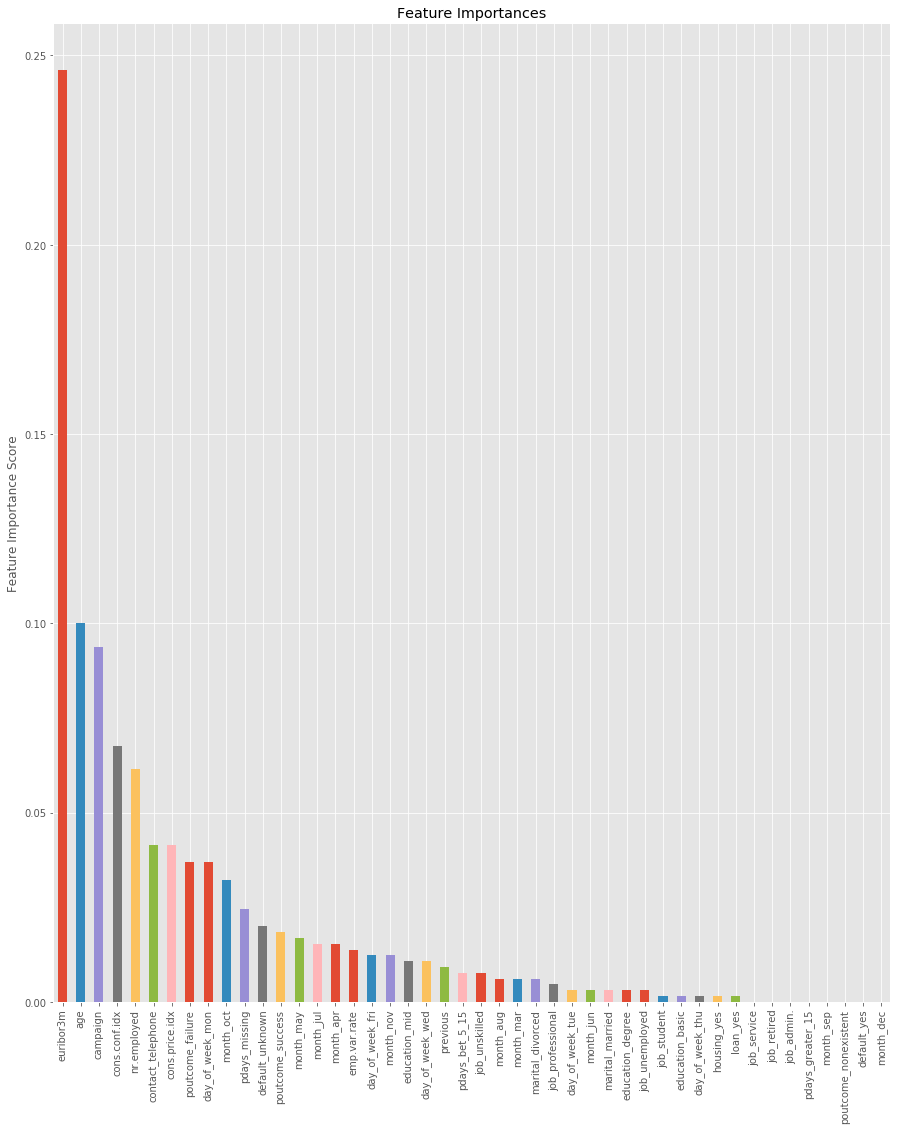

In [54]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (15, 18)

feat_imp = pd.Series(model.feature_importances_, bank_additional_full_df.columns[0:46]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

### Plotting the auc-roc curve

In [55]:
#fpr, tpr, thresholds = metrics.roc_curve(yval, y_scores, pos_label=2)
a = yval.iloc[:].values
b =y_scores[:]
b.shape, a.shape


((8212, 2), (8212,))

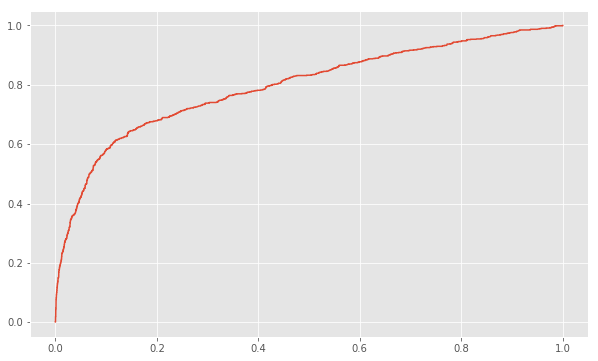

In [56]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
fpr, tpr, thresholds = metrics.roc_curve(a, y_scores[:,1])
plt.plot(fpr,tpr)
